In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

from notebooks.preprocessor import preprocess

from joblib import dump

In [2]:
columns = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "outcome",
    "level",
]

data = pd.read_csv(r"data.csv")
data.columns = columns

data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome,level
0,0,tcp,time,RSTO,0,0,0,0,0,0,...,0.00,0.07,0.00,0.00,0.00,0.0,1.00,1.00,neptune,18
1,0,udp,domain_u,SF,45,139,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,18
2,0,tcp,http,SF,344,4438,0,0,0,0,...,1.00,0.00,0.02,0.02,0.00,0.0,0.00,0.01,normal,21
3,0,udp,private,SF,28,0,0,3,0,0,...,0.18,0.82,0.18,0.00,0.09,0.0,0.73,0.00,teardrop,19
4,0,tcp,http,SF,329,1179,0,0,0,0,...,1.00,0.00,0.06,0.00,0.00,0.0,0.00,0.00,normal,21


In [3]:
encoder = preprocessing.OneHotEncoder(handle_unknown="ignore", sparse_output=True)
scaler = preprocessing.RobustScaler()
x, y, levels, encoder = preprocess(data, scaler, encoder, True)

In [4]:
x.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,-0.158273,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.003597,0.239655,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.079137,7.651724,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,-0.057554,0.000000,0.0,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.025180,2.032759,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
pca = PCA(n_components=20)
pca.fit(x)
x_reduced = pca.transform(x)

In [6]:
pd.DataFrame(x_reduced).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-147.737763,-33.822802,-276.139768,-0.212435,-3.696767,-2.489402,-0.384070,0.104908,-0.238717,-0.208781,0.023861,1.838450,-1.343897,0.166556,0.047640,-0.119427,-0.246528,-0.264731,-0.337825,0.099028
1,-147.575890,-33.583246,-276.146706,-0.218932,-3.848372,9.362463,13.946586,4.476784,0.189118,-0.476698,-0.882013,-0.252650,0.192070,0.782439,-0.038850,0.300348,0.220659,0.317545,-0.293015,0.142609
2,-146.499701,-26.172275,-276.268975,-0.207573,-1.602295,-1.612674,1.714308,-1.181465,-0.118402,0.306067,-1.448022,-0.341779,0.266536,-0.636815,-0.013754,0.190697,-0.073351,0.326167,0.088418,0.095892
3,-147.637048,-33.822738,-276.136435,-0.228155,-2.546554,2.705666,-3.077061,4.860559,0.713984,-8.693263,-1.432708,-0.614645,0.413941,1.205907,-0.012644,-0.233581,0.029280,0.661264,1.246428,0.079715
4,-146.554169,-31.790547,-276.181264,-0.212568,-3.256336,-1.606751,-0.261725,-2.086536,-0.159033,0.386562,-1.258976,-0.218797,0.153997,-0.517949,0.022500,0.407007,-0.457196,0.263652,0.130923,0.293596


In [7]:
xtrain, xdev, ytrain, ydev = train_test_split(x_reduced, y, test_size=0.2, random_state=123)
xtrain_reg, xdev_reg, ytrain_reg, ydev_reg = train_test_split(x_reduced, levels, test_size=0.2, random_state=123)

In [8]:
classifier = RandomForestClassifier()
classifier.fit(xtrain, ytrain)

RandomForestClassifier()

In [9]:
ypred = classifier.predict(xdev)

accuracy = accuracy_score(ydev, ypred)
precision = precision_score(ydev, ypred, average='binary')
recall = recall_score(ydev, ypred, average='binary') 

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.9945911226800987
Precision: 0.9961114253393665
Recall: 0.9926025081020149


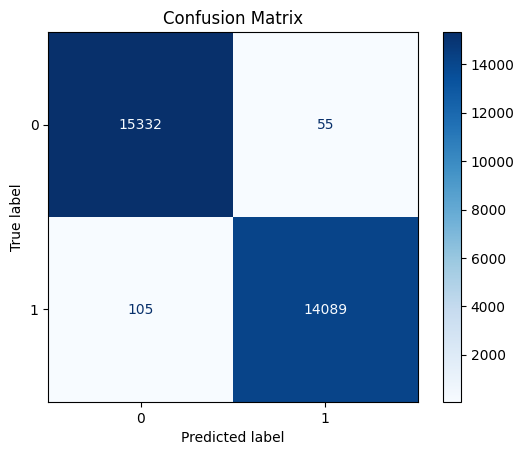

In [10]:
cm = confusion_matrix(ydev, ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [11]:
dump(pca, r"models\pca.joblib")
dump(scaler, r"models\scaler.joblib")
dump(classifier, r"models\random_forest_v1.joblib")
dump(encoder, r"models\one_hot_encoder.joblib")

['models\\one_hot_encoder.joblib']